In [1]:
pip install spacy

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1283, in render
    renderable = rich_cast(renderable)
  File 

In [19]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1283, in render
    renderable = rich_cast(renderable)
  File 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import spacy

/home/user/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [9]:
df_medical = pd.read_csv("mtsamples.csv")
df_medical.head()
# print("Dataset Structure:")
# print(df_medical.info())

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [10]:
df_medical.shape

(4999, 6)

In [11]:
df_medical = df_medical.loc[:,["transcription", "keywords"]]
df_medical

,transcription,keywords
0,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...
4994,"HISTORY:, I had the pleasure of meeting and e...",NaN
4995,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun..."
4996,"SUBJECTIVE: , This is a 42-year-old white fema...",NaN
4997,"CHIEF COMPLAINT: , This 5-year-old male presen...",NaN


In [12]:
df_medical.isnull().sum()

transcription      33
keywords         1068
dtype: int64

In [13]:
df_medical = df_medical[~(df_medical['transcription'].isnull()) & 
                        ~(df_medical['keywords'].isnull()) ]

df_medical.shape

(3898, 2)

/tmp/ipykernel_4778/3926128181.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transcription)


<AxesSubplot:xlabel='transcription', ylabel='Density'>

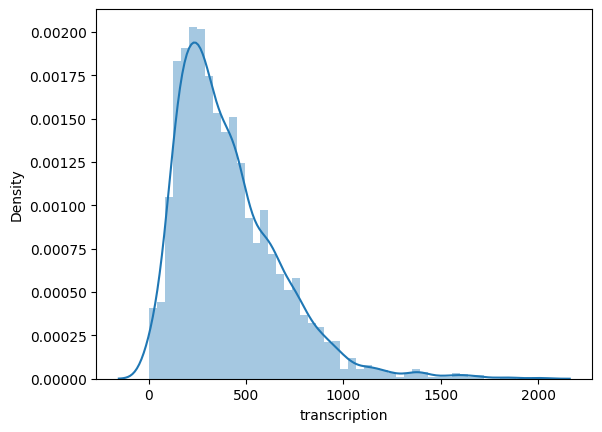

In [14]:
transcription = df_medical['transcription'].apply(lambda x: len(x.split()))
sns.distplot(transcription)

In [4]:
# Text cleaning
df_medical['cleaned_text'] = df_medical['transcription'].apply(lambda x: ' '.join([word.lower() for word in str(x).split() if word.isalnum()]))

# Handling missing values and duplicates
df_medical.dropna(subset=['cleaned_text'], inplace=True)
df_medical.drop_duplicates(subset='cleaned_text', inplace=True)


In [25]:
# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(df_medical['cleaned_text'], df_medical['medical_specialty'], test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

# Train/Fine-tune the model
clf = RandomForestClassifier()
clf.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred = clf.predict(X_val_tfidf)
print("Classification Report:")
print(classification_report(y_val, y_pred))

Classification Report:
                                precision    recall  f1-score   support

                       Autopsy       1.00      1.00      1.00         1
    Cardiovascular / Pulmonary       1.00      0.17      0.29         6
    Consult - History and Phy.       0.50      0.20      0.29         5
    Cosmetic / Plastic Surgery       0.00      0.00      0.00         1
                   Dermatology       0.00      0.00      0.00         3
             Discharge Summary       0.00      0.00      0.00         4
          ENT - Otolaryngology       0.00      0.00      0.00         1
        Emergency Room Reports       0.00      0.00      0.00         4
              Gastroenterology       0.00      0.00      0.00         5
              General Medicine       0.38      0.63      0.47        35
         Hematology - Oncology       0.00      0.00      0.00         2
     Hospice - Palliative Care       0.00      0.00      0.00         1
        IME-QME-Work Comp etc.       0.0

/home/user/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
pip install spacy

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1283, in render
    renderable = rich_cast(renderable)
  File 

In [34]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1283, in render
    renderable = rich_cast(renderable)
  File 

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

# Download the Punkt tokenizer for tokenization using nltk
nltk.download('punkt', quiet=True)

# Load the medical transcription dataset
df_medical = pd.read_csv("mtsamples.csv")

# Text cleaning
df_medical['cleaned_text'] = df_medical['transcription'].apply(lambda x: ' '.join([str(word).lower() for word in str(x).split() if str(word).isalnum()]))

# Handling missing values and duplicates
df_medical.dropna(subset=['cleaned_text'], inplace=True)
df_medical.drop_duplicates(subset='cleaned_text', inplace=True)

# Check for non-string values in the 'transcription' column
non_string_values = df_medical[df_medical['transcription'].apply(lambda x: not isinstance(x, str))]

# If there are non-string values, replace them with an empty string or handle as needed
df_medical['transcription'] = df_medical['transcription'].apply(lambda x: '' if not isinstance(x, str) else x)

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(df_medical['cleaned_text'], df_medical['medical_specialty'], test_size=0.2, random_state=42)

# Tokenize text using nltk
def tokenize_text(text):
    return word_tokenize(text)

# Apply tokenization to 'transcription' column
df_medical['tokens'] = df_medical['transcription'].apply(tokenize_text)


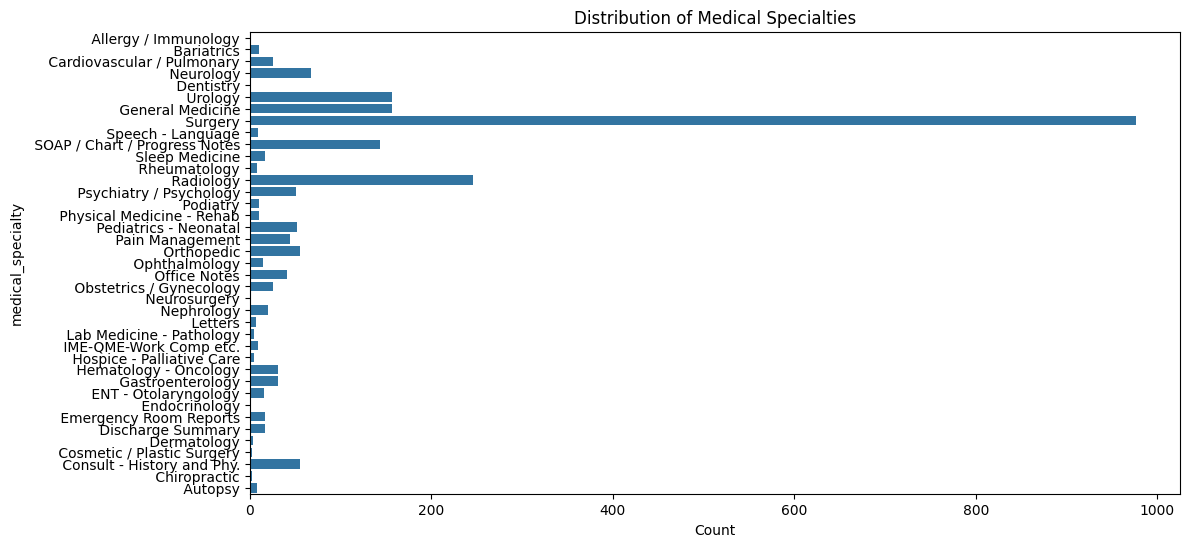

In [7]:
# Exploratory Data Analysis (EDA)
# Visualize the distribution of medical specialties
plt.figure(figsize=(12, 6))
sns.countplot(y='medical_specialty', data=df_medical)
plt.title('Distribution of Medical Specialties')
plt.xlabel('Count')
plt.show()


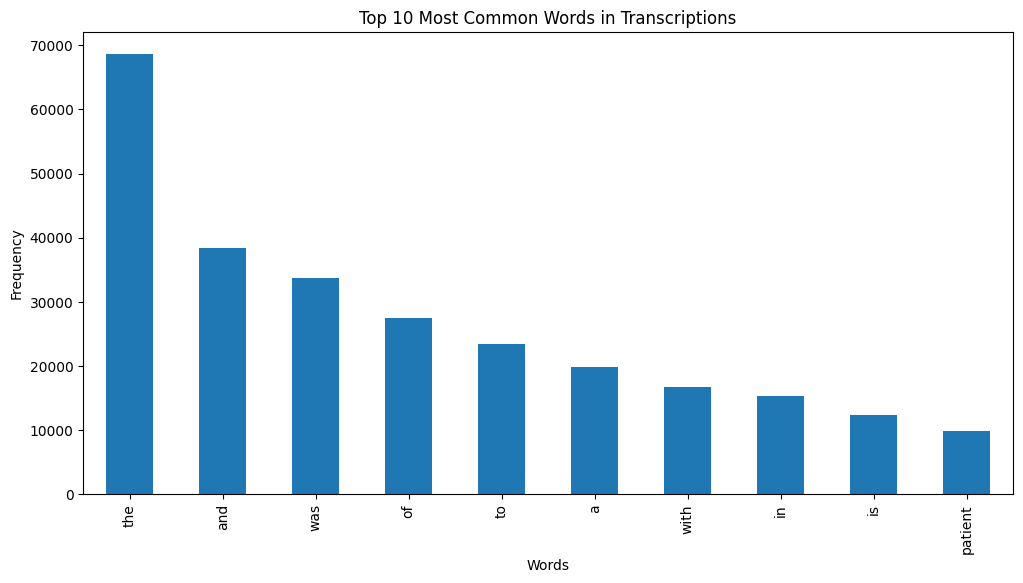

In [8]:
# Visualize the most common words in the dataset
common_words = pd.Series(' '.join(df_medical['cleaned_text']).split()).value_counts()[:10]
common_words.plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Most Common Words in Transcriptions')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

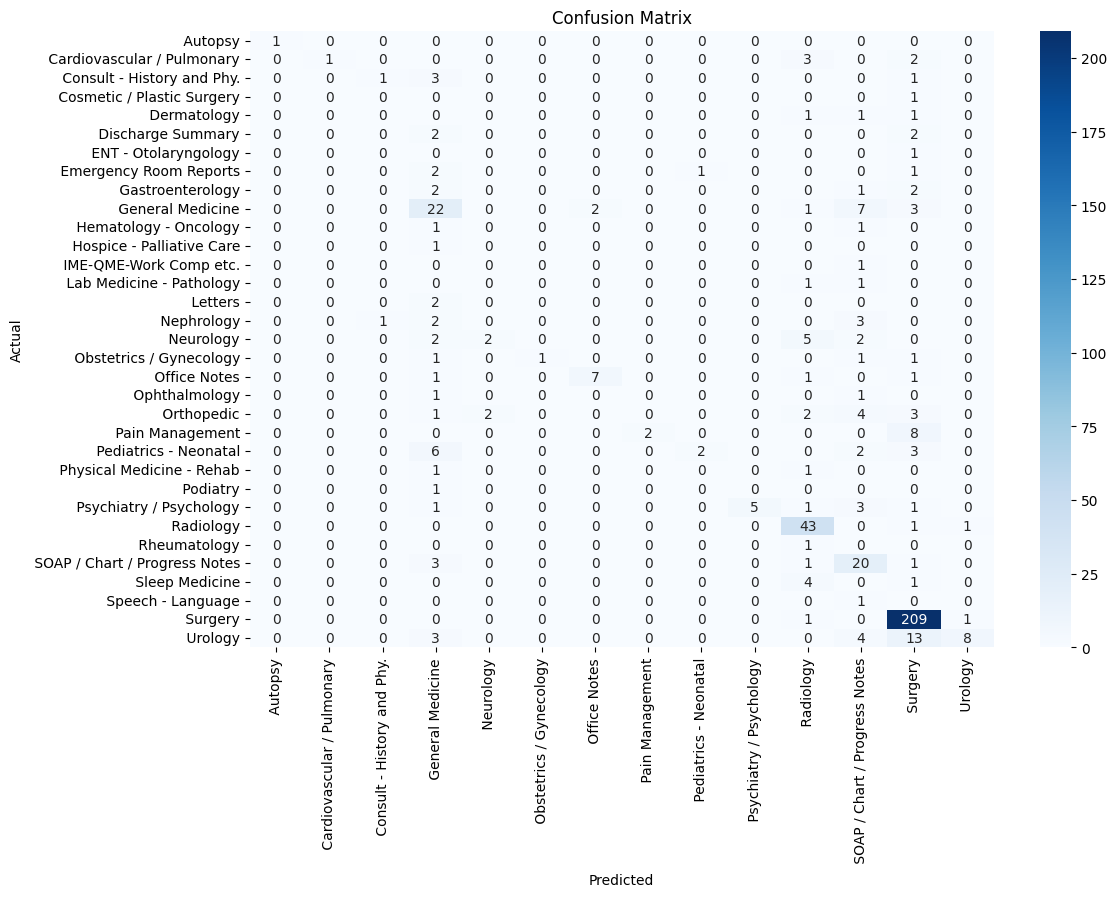

In [42]:
# Visualize the confusion matrix
conf_matrix = pd.crosstab(y_val, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()